## WeatherPy

In [45]:
# Dependencies
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import random
from citipy import citipy 
import matplotlib.pyplot as plt
import requests
import time
from config import apikey

## Gather Data

In [46]:
#Get random coordinates using import random. Latitude runs from 0 to 90 so we are asking for range +-90. Longtitude runs from
# 0 to 180 so we are asking for range +-180. 

#create empty lists we will append to
Latitude = []
Longitude = []
for x in range(0,1500):
    Latitude.append(random.uniform(-90,90))
    Longitude.append(random.uniform(-180,180))

#create dataframe for the latitude and longitude data we just collected. 

Cities = pd.DataFrame(columns = ["Latitude","Longitude"])
Cities["Latitude"] = Latitude
Cities["Longitude"] = Longitude

In [47]:
#Use Citiypy to get City closest to Coordinates

#create empty list we will append City name to
Cities1 =[]

#use iterrow to loop through Latitude and Longitude from DataFrame "Cities" we just created to get nearest city
for index, row in Cities.iterrows():
    City=citipy.nearest_city(row["Latitude"],row["Longitude"])
    Cities1.append(City.city_name)

#add the list of cities to the dataframe which already contains our Latitude and Longitude
Cities["City"]=Cities1

In [48]:
#remove any duplicate cities so only unique values. This is why we chose 1500 sets of random numbers....so that when 
#dupliates are elminated, we are left with at least 500 unique cities

new_data = Cities.drop_duplicates("City",keep="first")
print("We have " + str(len(new_data)) + " cities.")

# new_data

We have 618 cities.


In [49]:
#Utilize openweathermap api to get climate conditions at each city

units = "Imperial"
appid = apikey
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={apikey}&units={units}&q=" 


#create empty lists what we will append to with each API pull and set a city counter to 0
counter = 0
Temp = []
C = []
LTTE = []
LNGE = []
HUM = []
CL = []
WS = []


# Loop through the list of cities and perform a request for data on each
# because CityPy can return a City name that openweathermap might not recongize (for whatever reason), we utilize try/except

for index,row in new_data.iterrows():
    counter = counter + 1
    x=row["City"]
    q_url = query_url + str(x)
    response = requests.get(q_url).json()
    try:
        print(f"City #{counter}.") #print the # the city holds in our list (aka where we are in the loop)
        print(f"City name is {x} and its url is {q_url}.") #print the api url
        print("The City ID is " + str(response["id"]) + ".") #print the city id
        Temp.append(response['main']['temp']) #get the Temp (will be in farenheit cause we declared Imperial units)
        LNGE.append(response["coord"]["lon"]) #get Longitude
        LTTE.append(response["coord"]["lat"]) #get Latitue
        C.append(response["name"]) # get City Name
        HUM.append(response["main"]["humidity"]) #get Humidity
        CL.append(response["clouds"]["all"]) #get Cloudiness
        WS.append(response["wind"]["speed"]) #get WindSpeed (will be in mph cause we declared units Imperial)                       
    except: #if openweathermap cannot find a city, the city will be skipped and the message below will be prints
        print("This is not a city recognized in OpenWeatherMap.There will be no data for this city")
        pass
    print("------------------------------------------------------------------------------------")

#after cycling through the data, create a new data frame that contains all the info we just gathered and appended into lists
#first the dataframe and one column is created, and then each subsequent column is added
citydata=pd.DataFrame(columns = ["City"])

citydata["City"] = C
citydata["Longtitude"] = LNGE
citydata["Latitude"]=LTTE
citydata["Temperature"]= Temp
citydata["Humidity"] = HUM
citydata["Cloudiness"] = CL
citydata["Wind Speed"] = WS



City #1.
City name is amderma and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=amderma.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #2.
City name is mataura and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=mataura.
The City ID is 6201424.
------------------------------------------------------------------------------------
City #3.
City name is jaciara and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=jaciara.
The City ID is 3460355.
------------------------------------------------------------------------------------
City #4.
City name is saint-philippe and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&unit

City #31.
City name is jamestown and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=jamestown.
The City ID is 2069194.
------------------------------------------------------------------------------------
City #32.
City name is champerico and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=champerico.
The City ID is 3530097.
------------------------------------------------------------------------------------
City #33.
City name is touros and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=touros.
The City ID is 3386213.
------------------------------------------------------------------------------------
City #34.
City name is hirara and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=hirara.
The City ID is 1862505.
-----------

City #61.
City name is new norfolk and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=new norfolk.
The City ID is 2155415.
------------------------------------------------------------------------------------
City #62.
City name is tasiilaq and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=tasiilaq.
The City ID is 3424607.
------------------------------------------------------------------------------------
City #63.
City name is dicabisagan and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=dicabisagan.
The City ID is 1715015.
------------------------------------------------------------------------------------
City #64.
City name is samarai and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=samarai.
The City ID is 2132606.

City #92.
City name is mar del plata and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=mar del plata.
The City ID is 3863379.
------------------------------------------------------------------------------------
City #93.
City name is chapais and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=chapais.
The City ID is 5919850.
------------------------------------------------------------------------------------
City #94.
City name is saskylakh and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=saskylakh.
The City ID is 2017155.
------------------------------------------------------------------------------------
City #95.
City name is marsabit and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=marsabit.
The City ID is 187585.


City #122.
City name is nikolskoye and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=nikolskoye.
The City ID is 546105.
------------------------------------------------------------------------------------
City #123.
City name is constitucion and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=constitucion.
The City ID is 4011743.
------------------------------------------------------------------------------------
City #124.
City name is abha and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=abha.
The City ID is 110690.
------------------------------------------------------------------------------------
City #125.
City name is alice springs and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=alice springs.
The City ID is 20

City #153.
City name is cidreira and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=cidreira.
The City ID is 3466165.
------------------------------------------------------------------------------------
City #154.
City name is burica and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=burica.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #155.
City name is challakere and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=challakere.
The City ID is 1274862.
------------------------------------------------------------------------------------
City #156.
City name is georgetown and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e1

City #183.
City name is salym and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=salym.
The City ID is 1493162.
------------------------------------------------------------------------------------
City #184.
City name is tiksi and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=tiksi.
The City ID is 2015306.
------------------------------------------------------------------------------------
City #185.
City name is paucartambo and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=paucartambo.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #186.
City name is dikson and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&unit

City #214.
City name is padang and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=padang.
The City ID is 1633419.
------------------------------------------------------------------------------------
City #215.
City name is calvia and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=calvia.
The City ID is 2520493.
------------------------------------------------------------------------------------
City #216.
City name is arona and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=arona.
The City ID is 3182812.
------------------------------------------------------------------------------------
City #217.
City name is pasni and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=pasni.
The City ID is 1168312.
-------------------------

City #244.
City name is cherskiy and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=cherskiy.
The City ID is 2126199.
------------------------------------------------------------------------------------
City #245.
City name is longyearbyen and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=longyearbyen.
The City ID is 2729907.
------------------------------------------------------------------------------------
City #246.
City name is shadegan and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=shadegan.
The City ID is 116102.
------------------------------------------------------------------------------------
City #247.
City name is port augusta and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=port augusta.
The City ID is

City #273.
City name is clyde river and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=clyde river.
The City ID is 5924351.
------------------------------------------------------------------------------------
City #274.
City name is louisbourg and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=louisbourg.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #275.
City name is telford and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=telford.
The City ID is 3345439.
------------------------------------------------------------------------------------
City #276.
City name is ponta do sol and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d132337122

City #304.
City name is tabou and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=tabou.
The City ID is 2281120.
------------------------------------------------------------------------------------
City #305.
City name is harnosand and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=harnosand.
The City ID is 2707684.
------------------------------------------------------------------------------------
City #306.
City name is roebourne and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=roebourne.
The City ID is 2062276.
------------------------------------------------------------------------------------
City #307.
City name is vilhena and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=vilhena.
The City ID is 3924679.
---------

City #335.
City name is zabaykalsk and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=zabaykalsk.
The City ID is 2012780.
------------------------------------------------------------------------------------
City #336.
City name is evans and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=evans.
The City ID is 5576909.
------------------------------------------------------------------------------------
City #337.
City name is bengkulu and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=bengkulu.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #338.
City name is whitehorse and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e150

City #365.
City name is ikongo and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=ikongo.
The City ID is 1064234.
------------------------------------------------------------------------------------
City #366.
City name is innisfail and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=innisfail.
The City ID is 5983430.
------------------------------------------------------------------------------------
City #367.
City name is eregli and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=eregli.
The City ID is 315498.
------------------------------------------------------------------------------------
City #368.
City name is vredendal and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=vredendal.
The City ID is 3359736.
----------

City #395.
City name is boras and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=boras.
The City ID is 2720501.
------------------------------------------------------------------------------------
City #396.
City name is akureyri and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=akureyri.
The City ID is 2633274.
------------------------------------------------------------------------------------
City #397.
City name is moyale and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=moyale.
The City ID is 186180.
------------------------------------------------------------------------------------
City #398.
City name is vitim and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=vitim.
The City ID is 2013375.
----------------------

City #425.
City name is aswan and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=aswan.
The City ID is 359792.
------------------------------------------------------------------------------------
City #426.
City name is shkotovo-22 and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=shkotovo-22.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #427.
City name is karaul and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=karaul.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #428.
City name is ihosy and its url is http://api.openweathermap.org/

City #455.
City name is anloga and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=anloga.
The City ID is 2304548.
------------------------------------------------------------------------------------
City #456.
City name is ieud and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=ieud.
The City ID is 675721.
------------------------------------------------------------------------------------
City #457.
City name is sibolga and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=sibolga.
The City ID is 1213855.
------------------------------------------------------------------------------------
City #458.
City name is qandahar and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=qandahar.
This is not a city recognized in OpenWeather

City #485.
City name is hami and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=hami.
The City ID is 1529484.
------------------------------------------------------------------------------------
City #486.
City name is tommot and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=tommot.
The City ID is 2015179.
------------------------------------------------------------------------------------
City #487.
City name is luganville and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=luganville.
The City ID is 2136150.
------------------------------------------------------------------------------------
City #488.
City name is tabiauea and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=tabiauea.
This is not a city recognized in Open

City #515.
City name is autlan and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=autlan.
This is not a city recognized in OpenWeatherMap.There will be no data for this city
------------------------------------------------------------------------------------
City #516.
City name is bowen and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=bowen.
The City ID is 2174444.
------------------------------------------------------------------------------------
City #517.
City name is botwood and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=botwood.
The City ID is 5906229.
------------------------------------------------------------------------------------
City #518.
City name is santa cruz cabralia and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e1509

City #545.
City name is nanortalik and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=nanortalik.
The City ID is 3421765.
------------------------------------------------------------------------------------
City #546.
City name is pundaguitan and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=pundaguitan.
The City ID is 1698289.
------------------------------------------------------------------------------------
City #547.
City name is turukhansk and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=turukhansk.
The City ID is 1488903.
------------------------------------------------------------------------------------
City #548.
City name is callaway and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=callaway.
The City ID is 

City #575.
City name is ballina and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=ballina.
The City ID is 2966778.
------------------------------------------------------------------------------------
City #576.
City name is dharchula and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=dharchula.
The City ID is 1272864.
------------------------------------------------------------------------------------
City #577.
City name is gazli and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=gazli.
The City ID is 1513990.
------------------------------------------------------------------------------------
City #578.
City name is nanzhang and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=nanzhang.
The City ID is 1799574.
-----------

City #605.
City name is telsiai and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=telsiai.
The City ID is 593926.
------------------------------------------------------------------------------------
City #606.
City name is changji and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=changji.
The City ID is 1790885.
------------------------------------------------------------------------------------
City #607.
City name is saint-louis and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=saint-louis.
The City ID is 2978742.
------------------------------------------------------------------------------------
City #608.
City name is constantine and its url is http://api.openweathermap.org/data/2.5/weather?appid=074b0d7d1323371221cd9dce8e15094a&units=Imperial&q=constantine.
The City ID is 2501152

In [50]:
#print head of datafram to verify it looks ok
citydata.head()

,City,Longtitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Mataura,168.86,-46.19,55.99,71,88,5.39
1,Jaciara,-54.98,-15.95,73.72,92,8,2.71
2,Saint-Philippe,-73.48,45.36,29.32,79,1,8.05
3,Torbay,-52.73,47.66,30.20,92,90,27.51
4,Victoria,115.24,5.28,89.60,75,75,4.70


## Temp Vs Latitude

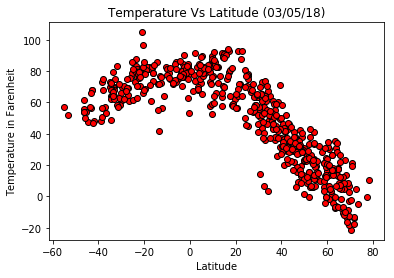

In [51]:
#Temp vs Latitude Graph

#set x value as Latitude and y as Temperature. Then repeat with humidity, cloudiness and windspeed.

xvalue = citydata["Latitude"]
yvalue = citydata["Temperature"]

plt.title("Temperature Vs Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature in Farenheit")

plt.scatter(xvalue, yvalue, marker="o", color="red", edgecolor="black")
plt.savefig("Temp Vs Latitude.png")
plt.show()


# Humidity vs Latitude


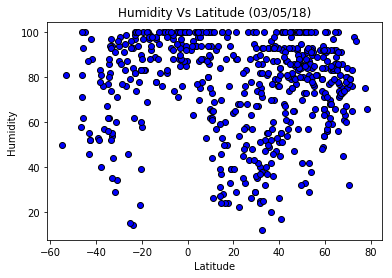

In [52]:
#Humidity vs Latitude Graph

xvalue = citydata["Latitude"]
yvalue = citydata["Humidity"]

plt.title("Humidity Vs Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(xvalue, yvalue, marker="o", color="blue", edgecolor="black")
plt.savefig("Humidity Vs Latitude.png")
plt.show()


## Cloudiness vs Latitude

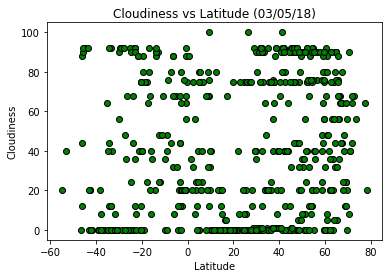

In [53]:
#Cloudiness vs Latitude Graph
xvalue = citydata["Latitude"]
yvalue = citydata["Cloudiness"]

plt.title("Cloudiness vs Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(xvalue, yvalue, marker="o", color="green", edgecolor="black")
plt.savefig("Cloudiness Vs Latitude.png")
plt.show()



## Wind Speed vs Latitude

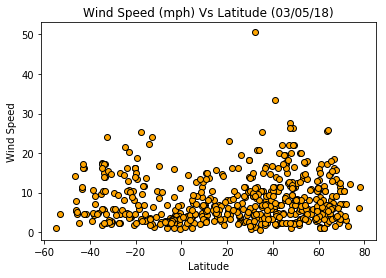

In [54]:
#Wind Speed vs Latitude Graph
xvalue = citydata["Latitude"]
yvalue = citydata["Wind Speed"]

plt.title("Wind Speed (mph) Vs Latitude (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(xvalue, yvalue, marker="o", color="orange", edgecolor="black")
plt.savefig("Wind Speed in mph Vs Latitude.png")
plt.show()



## Analysis

In [55]:
#There appears to be a strong relationship between Temperature and distance from the equator. The farther one is away from
#the equator (Lat= 0), the colder it gets


#There doesnt seem to be a very strong correlation with Wind Speed or Cloudiness with Latitude
#There appears to be more cities in the Northern Hemisphere than Southern.